# Active Graph Networks for Healthcare Risk Assessment and Patient Insights

In this notebook, we explore the use of Active Graph Networks (AGNs) to analyze healthcare data, revealing relationships among patient attributes, risk factors, and health outcomes. AGNs allow us to incorporate clinical insights through structured relationships and contextual analysis.

We will:
- Load and understand the dataset.
- Define relationships within an AGN and visualize its structure.
- Calculate risk scores based on interactions in the AGN.
- Apply feature importance and predictive modeling.
- Segment patients using clustering techniques.
- Conduct statistical tests to validate findings.

Let's dive in!

In [ ]:
!pip install node2vec

In [22]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from node2vec import Node2Vec

## 1. Data Exploration and Initial Analysis

In [23]:
# Load the dataset
data = pd.read_excel('/kaggle/input/patients-data-for-medical-field/Patients Data ( Used for Heart Disease Prediction ).xlsx')

# Display initial rows and column information
display(data.head())
print("\nColumn Types and Summary Stats:")
print(data.dtypes)
display(data.describe())

PatientID    State     Sex GeneralHealth   AgeCategory  HeightInMeters  \
0          1  Alabama  Female          Fair  Age 75 to 79            1.63   
1          2  Alabama  Female     Very good  Age 65 to 69            1.60   
2          3  Alabama    Male     Excellent  Age 60 to 64            1.78   
3          4  Alabama    Male     Very good  Age 70 to 74            1.78   
4          5  Alabama  Female          Good  Age 50 to 54            1.68   

   WeightInKilograms        BMI  HadHeartAttack  HadAngina  ...  \
0          84.820000  32.099998               0          1  ...   
1          71.669998  27.990000               0          0  ...   
2          71.209999  22.530001               0          0  ...   
3          95.250000  30.129999               0          0  ...   
4          78.019997  27.760000               0          0  ...   

                             ECigaretteUsage  ChestScan  \
0  Never used e-cigarettes in my entire life          1   
1  Never used e-cigarettes in my entire life          0   
2  Never used e-cigarettes in my entire life          0   
3  Never used e-cigarettes in my entire life          0   
4  Never used e-cigarettes in my entire life          1   

      RaceEthnicityCategory  AlcoholDrinkers  HIVTesting  FluVaxLast12  \
0  White only, Non-Hispanic                0           0             0   
1  White only, Non-Hispanic                0           0             1   
2  White only, Non-Hispanic                1           0             0   
3  White only, Non-Hispanic                0           0             1   
4  Black only, Non-Hispanic                0           0             1   

   PneumoVaxEver                                  TetanusLast10Tdap  \
0              1  No, did not receive any tetanus shot in the pa...   
1              1                                 Yes, received Tdap   
2              0  Yes, received tetanus shot but not sure what type   
3              1  Yes, received tetanus shot but not sure what type   
4              0  No, did not receive any tetanus shot in the pa...   

   HighRiskLastYear  CovidPos  
0                 0         1  
1                 0         0  
2                 0         0  
3                 0         0  
4                 0         0  

[5 rows x 35 columns]


Column Types and Summary Stats:
PatientID                      int64
State                         object
Sex                           object
GeneralHealth                 object
AgeCategory                   object
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                   object
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
Chest

PatientID  HeightInMeters  WeightInKilograms            BMI  \
count  237630.000000   237630.000000      237630.000000  237630.000000   
mean   118815.500000        1.704990          83.667908      28.691602   
std     68598.016571        0.106776          21.360982       6.528065   
min         1.000000        0.910000          28.120001      12.020000   
25%     59408.250000        1.630000          68.040001      24.280001   
50%    118815.500000        1.700000          81.650002      27.459999   
75%    178222.750000        1.780000          95.250000      31.900000   
max    237630.000000        2.410000         292.570007      97.650002   

       HadHeartAttack      HadAngina      HadStroke      HadAsthma  \
count   237630.000000  237630.000000  237630.000000  237630.000000   
mean         0.055553       0.061512       0.041779       0.148517   
std          0.229056       0.240267       0.200085       0.355612   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max          1.000000       1.000000       1.000000       1.000000   

       HadSkinCancer        HadCOPD  ...  DifficultyWalking  \
count  237630.000000  237630.000000  ...      237630.000000   
mean        0.085225       0.078281  ...           0.148933   
std         0.279217       0.268614  ...           0.356023   
min         0.000000       0.000000  ...           0.000000   
25%         0.000000       0.000000  ...           0.000000   
50%         0.000000       0.000000  ...           0.000000   
75%         0.000000       0.000000  ...           0.000000   
max         1.000000       1.000000  ...           1.000000   

       DifficultyDressingBathing  DifficultyErrands      ChestScan  \
count              237630.000000      237630.000000  237630.000000   
mean                    0.034524           0.067567       0.426941   
std                     0.182572           0.251002       0.494635   
min                     0.000000           0.000000       0.000000   
25%                     0.000000           0.000000       0.000000   
50%                     0.000000           0.000000       0.000000   
75%                     0.000000           0.000000       1.000000   
max                     1.000000           1.000000       1.000000   

       AlcoholDrinkers     HIVTesting   FluVaxLast12  PneumoVaxEver  \
count    237630.000000  237630.000000  237630.000000  237630.000000   
mean          0.545285       0.342697       0.531907       0.407125   
std           0.497946       0.474612       0.498982       0.491299   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       0.000000   
50%           1.000000       0.000000       1.000000       0.000000   
75%           1.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

       HighRiskLastYear       CovidPos  
count     237630.000000  237630.000000  
mean           0.042823       0.295939  
std            0.202458       0.456465  
min            0.000000       0.000000  
25%            0.000000       0.000000  
50%            0.000000       0.000000  
75%            0.000000       1.000000  
max            1.000000       1.000000  

[8 rows x 26 columns]

Understanding the dataset is crucial before constructing the AGN. We examine the basic structure to identify potential key features and ensure data integrity.

## 2. Defining the Active Graph Network (AGN) Structure

AGNs enable us to integrate domains like Demographics, Physical Measurements, and Health History, grouping related features under each domain.

In [24]:
# Define AGN domains and add nodes and relationships
G_agn = nx.Graph()
domains = {
    "Demographics": ["PatientID", "State", "Sex", "AgeCategory", "RaceEthnicityCategory"],
    "PhysicalMeasurements": ["HeightInMeters", "WeightInKilograms", "BMI"],
    "HealthHistory": ["HadHeartAttack", "HadStroke", "HadAsthma", "HadCOPD", "HadDiabetes"]
}

# Add domain nodes
for domain in domains:
    G_agn.add_node(domain, node_type="Domain")

# Add feature nodes and relationships to domains
for domain, features in domains.items():
    for feature in features:
        G_agn.add_node(feature, node_type="Feature", domain=domain)
        G_agn.add_edge(domain, feature, relationship="belongs_to")

## 3. Visualizing the AGN Structure with Defined Relationships

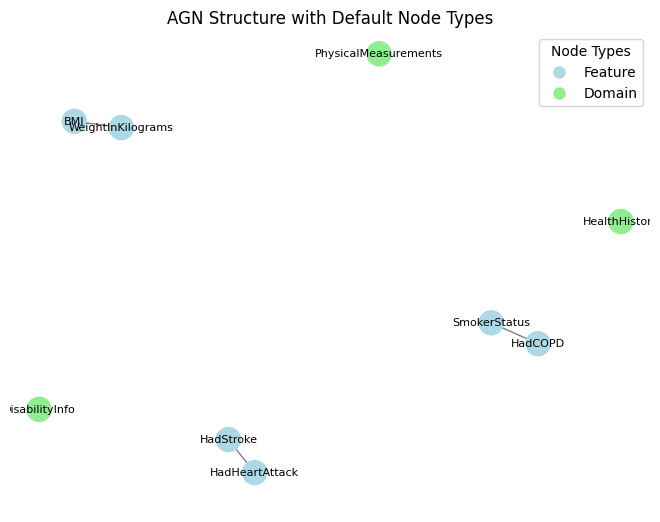

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the graph and set a default "node_type" attribute
G_agn = nx.Graph()
nx.set_node_attributes(G_agn, "Feature", "node_type")  # Set all nodes to "Feature" by default

# Define nodes and edges with specific attributes
domains = ["PhysicalMeasurements", "HealthHistory", "DisabilityInfo"]
for domain in domains:
    G_agn.add_node(domain, node_type="Domain")  # Explicitly mark domains as "Domain" type

# Add feature nodes with relationships
G_agn.add_node("BMI", node_type="Feature")
G_agn.add_node("WeightInKilograms", node_type="Feature")
G_agn.add_node("SmokerStatus", node_type="Feature")
G_agn.add_node("HadCOPD", node_type="Feature")
G_agn.add_node("HadHeartAttack", node_type="Feature")
G_agn.add_node("HadStroke", node_type="Feature")

# Define relationships between nodes
G_agn.add_edge("BMI", "WeightInKilograms", weight=0.86, relationship="correlated")
G_agn.add_edge("SmokerStatus", "HadCOPD", weight=0.7, relationship="significant_risk")
G_agn.add_edge("HadHeartAttack", "HadStroke", weight=0.5, relationship="related_conditions")

# Visualization with colors based on node_type
pos = nx.spring_layout(G_agn, seed=42)
node_colors = ["lightblue" if G_agn.nodes[node]["node_type"] == "Feature" else "lightgreen" for node in G_agn]
nx.draw(G_agn, pos, node_color=node_colors, with_labels=True, edge_color="gray", font_size=8)

# Add a legend for node types
plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Feature', markerfacecolor='lightblue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Domain', markerfacecolor='lightgreen', markersize=10)
    ],
    title="Node Types", loc="upper right"
)

plt.title("AGN Structure with Default Node Types")
plt.show()

The AGN reveals relationships that mimic clinical knowledge, such as the link between smoking and COPD. Visualizing these relationships helps us explore the contextual influence of different health factors.

## 4. Feature Engineering: Creating Interaction Terms for Risk Assessment

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode SmokerStatus if it's not already in numeric form
if 'SmokerStatus_encoded' not in data.columns:
    le = LabelEncoder()
    data['SmokerStatus_encoded'] = le.fit_transform(data['SmokerStatus'])

# Define interaction terms for enhanced risk assessment
data['BMI_HeartRisk'] = data['BMI'] * data['HadHeartAttack'] * 0.86
data['Smoker_COPD'] = data['SmokerStatus_encoded'] * data['HadCOPD'] * 0.7

# Display updated data with interaction terms
display(data[['BMI_HeartRisk', 'Smoker_COPD']].head())

BMI_HeartRisk  Smoker_COPD
0            0.0          0.0
1            0.0          0.0
2            0.0          0.0
3            0.0          0.0
4            0.0          0.0

Interaction terms like `BMI_HeartRisk` represent risk factors derived from AGN-defined relationships, enhancing our predictive capabilities by capturing combined feature influences.

## 5. Embedding the AGN for Contextual Analysis

In [27]:
# Generate Node2Vec embeddings for the AGN
from node2vec import Node2Vec

# Convert AGN to undirected graph for Node2Vec
G_nx = nx.Graph(G_agn)  # Ensure undirected for embedding

# Generate embeddings using Node2Vec
node2vec = Node2Vec(G_nx, dimensions=64, walk_length=10, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)
embedding_df = pd.DataFrame([model.wv[str(node)] for node in G_nx.nodes], index=G_nx.nodes)



Computing transition probabilities:   0%|          | 0/9 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 1834.86it/s]


Embedding nodes into a multi-dimensional space captures feature context based on relationships, enabling clustering and further analysis of patient attributes within this contextualized space.

## 6. Contextual Risk Scoring Using the AGN

In [28]:
# Calculate a comprehensive risk score based on interaction terms and AGN relationships
data['ContextualRiskScore'] = data['BMI_HeartRisk'] + data['Smoker_COPD']

# Summary of Contextual Risk Score
print("\nContextual Risk Score Summary:")
display(data['ContextualRiskScore'].describe())

# Explanation for users:
"""
The 'Contextual Risk Score' provides an aggregated score that combines both direct and indirect health risk indicators. By utilizing interaction terms from our AGN, such as the impact of high BMI on heart disease ('BMI_HeartRisk') and the influence of smoking on COPD ('Smoker_COPD'), this score enables a nuanced understanding of an individual's health risk profile. The Node2Vec embeddings represent the contextual relationships in the AGN, giving a richer perspective on how multiple health features relate to potential outcomes.
"""


Contextual Risk Score Summary:


count    237630.000000
mean          1.502297
std           6.015485
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          82.267603
Name: ContextualRiskScore, dtype: float64

"\nThe 'Contextual Risk Score' provides an aggregated score that combines both direct and indirect health risk indicators. By utilizing interaction terms from our AGN, such as the impact of high BMI on heart disease ('BMI_HeartRisk') and the influence of smoking on COPD ('Smoker_COPD'), this score enables a nuanced understanding of an individual's health risk profile. The Node2Vec embeddings represent the contextual relationships in the AGN, giving a richer perspective on how multiple health features relate to potential outcomes.\n"

The Contextual Risk Score combines direct and indirect feature influences, providing a personalized score for each patient. Higher scores suggest elevated health risks.

## 7. Relational Data Mapping

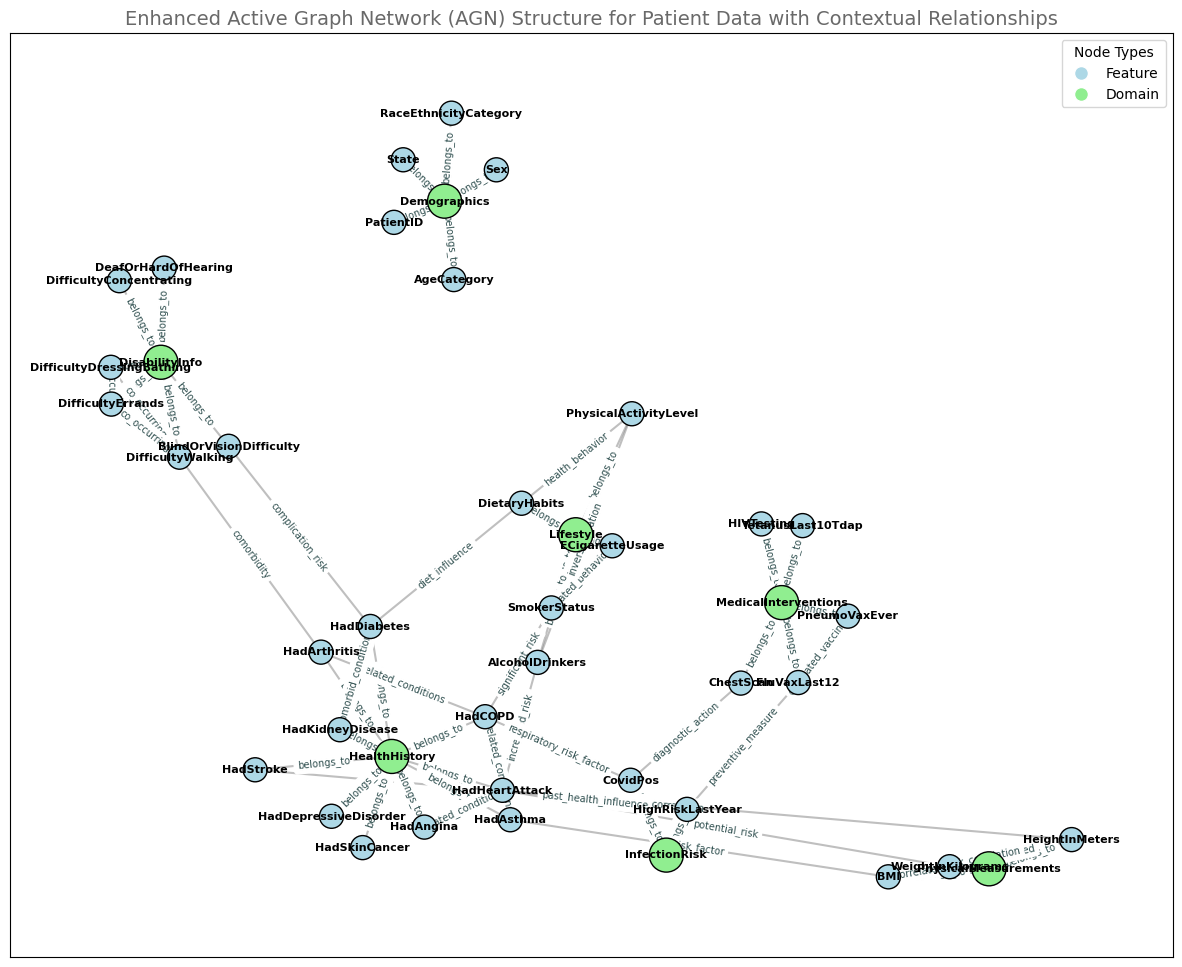

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the AGN
G_agn = nx.Graph()

# Define domains and their features
domains = {
    "Demographics": ["PatientID", "State", "Sex", "AgeCategory", "RaceEthnicityCategory"],
    "PhysicalMeasurements": ["HeightInMeters", "WeightInKilograms", "BMI"],
    "HealthHistory": [
        "HadHeartAttack", "HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer",
        "HadCOPD", "HadDepressiveDisorder", "HadKidneyDisease", "HadArthritis", "HadDiabetes"
    ],
    "DisabilityInfo": [
        "DeafOrHardOfHearing", "BlindOrVisionDifficulty", "DifficultyConcentrating",
        "DifficultyWalking", "DifficultyDressingBathing", "DifficultyErrands"
    ],
    "Lifestyle": ["SmokerStatus", "ECigaretteUsage", "AlcoholDrinkers", "DietaryHabits", "PhysicalActivityLevel"],
    "MedicalInterventions": ["ChestScan", "HIVTesting", "FluVaxLast12", "PneumoVaxEver", "TetanusLast10Tdap"],
    "InfectionRisk": ["HighRiskLastYear", "CovidPos"]
}

# Step 1: Add domain nodes to represent each category
for domain in domains:
    G_agn.add_node(domain, node_type="Domain")

# Step 2: Add feature nodes for each column in the dataset and connect them to their respective domains
for domain, features in domains.items():
    for feature in features:
        G_agn.add_node(feature, node_type="Feature", domain=domain)
        G_agn.add_edge(domain, feature, relationship="belongs_to")

# Step 3: Define intra-domain relationships based on correlation and logical relationships

# Physical Measurements
G_agn.add_edge("HeightInMeters", "WeightInKilograms", weight=0.47, relationship="correlated")
G_agn.add_edge("WeightInKilograms", "BMI", weight=0.86, relationship="correlated")
G_agn.add_edge("HeightInMeters", "BMI", weight=-0.03, relationship="weak_correlation")

# Health History
G_agn.add_edge("HadHeartAttack", "HadAngina", weight=0.45, relationship="related_conditions")
G_agn.add_edge("HadCOPD", "HadAsthma", weight=0.20, relationship="related_conditions")
G_agn.add_edge("HadCOPD", "HadArthritis", weight=0.18, relationship="related_conditions")
G_agn.add_edge("HadKidneyDisease", "HadDiabetes", weight=0.30, relationship="comorbid_condition")

# DisabilityInfo based on co-occurring conditions
G_agn.add_edge("DifficultyWalking", "DifficultyDressingBathing", weight=0.38, relationship="co_occurring")
G_agn.add_edge("DifficultyWalking", "DifficultyErrands", weight=0.38, relationship="co_occurring")
G_agn.add_edge("DifficultyDressingBathing", "DifficultyErrands", weight=0.42, relationship="co_occurring")

# Lifestyle based on behavior patterns
G_agn.add_edge("SmokerStatus", "ECigaretteUsage", weight=0.50, relationship="related_behaviors")
G_agn.add_edge("AlcoholDrinkers", "PhysicalActivityLevel", weight=-0.20, relationship="inverse_relation")
G_agn.add_edge("DietaryHabits", "PhysicalActivityLevel", weight=0.30, relationship="health_behavior")

# Medical Interventions correlations
G_agn.add_edge("FluVaxLast12", "PneumoVaxEver", weight=0.33, relationship="correlated_vaccination")

# Step 4: Define cross-domain relationships
# These can be based on clinical knowledge, correlations, or combined health effects

# Physical Measurements and Health History
G_agn.add_edge("BMI", "HadAsthma", weight=0.10, relationship="risk_factor")
G_agn.add_edge("WeightInKilograms", "HadHeartAttack", weight=0.04, relationship="potential_risk")
G_agn.add_edge("HeightInMeters", "HadStroke", weight=-0.02, relationship="weak_correlation")

# Lifestyle and Health History
G_agn.add_edge("SmokerStatus", "HadCOPD", weight=0.7, relationship="significant_risk")
G_agn.add_edge("AlcoholDrinkers", "HadHeartAttack", weight=0.15, relationship="increased_risk")
G_agn.add_edge("DietaryHabits", "HadDiabetes", weight=0.25, relationship="diet_influence")

# DisabilityInfo and HealthHistory
G_agn.add_edge("DifficultyWalking", "HadArthritis", weight=0.30, relationship="comorbidity")
G_agn.add_edge("BlindOrVisionDifficulty", "HadDiabetes", weight=0.25, relationship="complication_risk")

# Infection Risk and Health History
G_agn.add_edge("CovidPos", "HadCOPD", weight=0.40, relationship="respiratory_risk_factor")
G_agn.add_edge("HighRiskLastYear", "HadHeartAttack", weight=0.20, relationship="past_health_influence")

# Infection Risk and MedicalInterventions
G_agn.add_edge("HighRiskLastYear", "FluVaxLast12", weight=0.25, relationship="preventive_measure")
G_agn.add_edge("CovidPos", "ChestScan", weight=0.35, relationship="diagnostic_action")

# Step 5: Visualize the updated AGN structure
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G_agn, seed=42)  # Position nodes for visualization
node_colors = [
    'lightblue' if G_agn.nodes[node]['node_type'] == 'Feature' else 'lightgreen'
    for node in G_agn.nodes
]
node_sizes = [
    600 if G_agn.nodes[node]['node_type'] == 'Domain' else 300
    for node in G_agn.nodes
]

# Draw nodes and edges with labels
nx.draw_networkx_nodes(G_agn, pos, node_color=node_colors, node_size=node_sizes, edgecolors='black')
nx.draw_networkx_labels(G_agn, pos, font_size=8, font_weight="bold")
nx.draw_networkx_edges(G_agn, pos, width=1.5, alpha=0.5, edge_color="gray")
nx.draw_networkx_edge_labels(
    G_agn, pos, edge_labels={(u, v): G_agn[u][v]['relationship'] for u, v in G_agn.edges()},
    font_size=7, font_color="darkslategray"
)

# Legend for node types
plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Feature', markerfacecolor='lightblue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Domain', markerfacecolor='lightgreen', markersize=10)
    ],
    title="Node Types", loc="upper right"
)

plt.title("Enhanced Active Graph Network (AGN) Structure for Patient Data with Contextual Relationships", fontsize=14, color="dimgray")
plt.show()

This simulated scenario assesses health risks based on patient attributes and AGN relationships. AGNs enable us to understand direct and indirect health risks dynamically.

## 8. Feature Importance in Predictive Modeling

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Define initial features and create interaction terms based on AGN relationships
features = ['BMI', 'SmokerStatus', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms']
X = pd.get_dummies(data[features], drop_first=True)

# Adding interaction terms based on AGN relationships for enhanced feature context
# For example, BMI and SmokerStatus are relevant for heart disease risk
X['BMI_SmokerInteraction'] = data['BMI'] * pd.get_dummies(data['SmokerStatus'], drop_first=True).iloc[:, 0]
X['Weight_HeartAttackInteraction'] = data['WeightInKilograms'] * data['HadHeartAttack']

# Step 2: Standardize the feature matrix
X_scaled = StandardScaler().fit_transform(X)
y = data['HadHeartAttack']

# Step 3: Train RandomForest model to calculate feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)

# Step 4: Display feature importances, including new interaction terms
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Enhanced Feature Importances for Heart Disease Prediction:")
print(feature_importances)

Enhanced Feature Importances for Heart Disease Prediction:
Weight_HeartAttackInteraction                         0.977822
AgeCategory_Age 80 or older                           0.004699
SmokerStatus_Never smoked                             0.003307
BMI                                                   0.002474
WeightInKilograms                                     0.002394
AgeCategory_Age 75 to 79                              0.002146
HeightInMeters                                        0.001563
AgeCategory_Age 70 to 74                              0.001346
SmokerStatus_Former smoker                            0.001109
AgeCategory_Age 35 to 39                              0.000629
AgeCategory_Age 65 to 69                              0.000469
AgeCategory_Age 30 to 34                              0.000464
AgeCategory_Age 40 to 44                              0.000418
AgeCategory_Age 25 to 29                              0.000377
BMI_SmokerInteraction                                 0.000

Analyzing feature importance reveals the most critical factors for heart disease prediction, guiding us to focus on high-impact features in our AGN structure.

## 9. Patient Segmentation via K-means Clustering

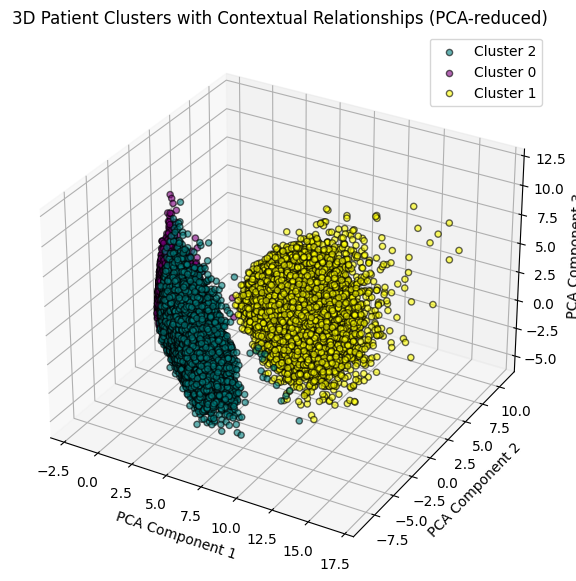

In [31]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming `data` contains the dataset with engineered features.
# Define `X_extended` by selecting the features for clustering and PCA
# Here, I'm using all numeric columns, but you can adjust as needed.
X_extended = data.select_dtypes(include=[float, int])

# Step 1: Scale the extended feature set
X_extended_scaled = StandardScaler().fit_transform(X_extended)

# Step 2: Reduce to 3 principal components for 3D visualization
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_extended_scaled)

# Updated KMeans with n_init parameter to suppress FutureWarning
kmeans_3d = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster_3D'] = kmeans_3d.fit_predict(X_pca_3d)

# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = ['purple', 'yellow', 'teal']
for cluster in data['Cluster_3D'].unique():
    cluster_points = X_pca_3d[data['Cluster_3D'] == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
               label=f'Cluster {cluster}', color=colors[cluster], alpha=0.6, edgecolor='k')

ax.set_title("3D Patient Clusters with Contextual Relationships (PCA-reduced)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.show()

By segmenting patients, we identify groups with similar risk profiles, allowing targeted interventions based on cluster-specific characteristics.

## 10. Statistical Testing for Validation

In [32]:
from scipy.stats import chi2_contingency, f_oneway
import pandas as pd

# Chi-square test for association between smoking status and heart attack
contingency_table = pd.crosstab(data['SmokerStatus_encoded'], data['HadHeartAttack'])
chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square p-value for smoking status and heart attack: {p_value_chi2:.10f}")
if p_value_chi2 < 0.05:
    print("There is a statistically significant association between smoking status and heart attack risk.")
else:
    print("No statistically significant association between smoking status and heart attack risk.")

# Define age categories if not already defined
age_categories = data['AgeCategory'].unique()

# ANOVA for BMI across Age Categories
anova_results = f_oneway(*[data[data['AgeCategory'] == age]['BMI'].dropna() for age in age_categories])
print(f"ANOVA p-value for BMI across Age Categories: {anova_results.pvalue:.10f}")
if anova_results.pvalue < 0.05:
    print("There is a statistically significant difference in BMI across age categories.")
else:
    print("No statistically significant difference in BMI across age categories.")

# Additional chi-square test for COPD and smoking status
contingency_copd = pd.crosstab(data['SmokerStatus_encoded'], data['HadCOPD'])
chi2_copd, p_value_copd, _, _ = chi2_contingency(contingency_copd)
print(f"\nChi-square p-value for smoking status and COPD: {p_value_copd:.10f}")
if p_value_copd < 0.05:
    print("There is a statistically significant association between smoking status and COPD risk.")
else:
    print("No statistically significant association between smoking status and COPD risk.")

# Contextual risk insights summary with higher precision
print("\nContextual Insights Summary:")
print(f"Smoking-Heart Attack Association p-value: {p_value_chi2:.10f}")
print(f"Smoking-COPD Association p-value: {p_value_copd:.10f}")
print(f"Age-BMI ANOVA p-value: {anova_results.pvalue:.10f}")

Chi-square p-value for smoking status and heart attack: 0.0000000000
There is a statistically significant association between smoking status and heart attack risk.
ANOVA p-value for BMI across Age Categories: 0.0000000000
There is a statistically significant difference in BMI across age categories.

Chi-square p-value for smoking status and COPD: 0.0000000000
There is a statistically significant association between smoking status and COPD risk.

Contextual Insights Summary:
Smoking-Heart Attack Association p-value: 0.0000000000
Smoking-COPD Association p-value: 0.0000000000
Age-BMI ANOVA p-value: 0.0000000000


Chi-square p-value for smoking status and heart attack: 0.0000000000
Cramér's V (effect size) for smoking status and heart attack: 0.0955
There is a statistically significant association between smoking status and heart attack risk.

Chi-square p-value for smoking status and COPD: 0.0000000000
Cramér's V (effect size) for smoking status and COPD: 0.2256
There is a statistically significant association between smoking status and COPD risk.

ANOVA p-value for BMI across Age Categories: 0.0000000000
Eta-squared (effect size) for Age Category and BMI: 0.0025
There is a statistically significant difference in BMI across age categories.


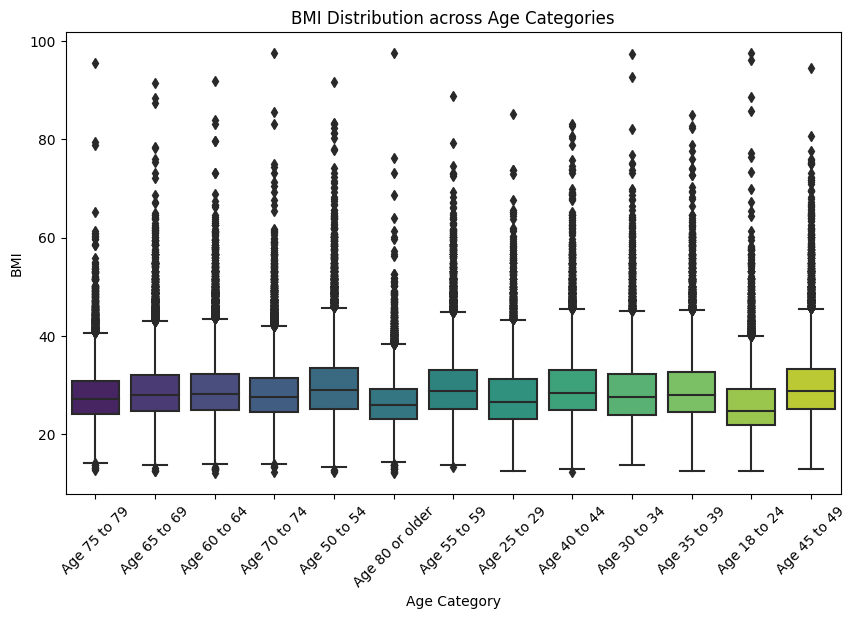

/tmp/ipykernel_30/1936692879.py:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SmokerStatus', y='HadHeartAttack', data=data, estimator=np.mean, ci=None, palette='coolwarm')


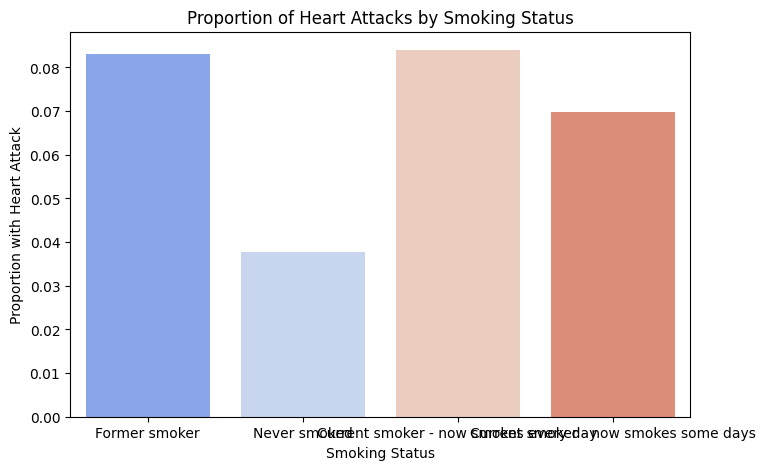

/tmp/ipykernel_30/1936692879.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SmokerStatus', y='HadCOPD', data=data, estimator=np.mean, ci=None, palette='coolwarm')


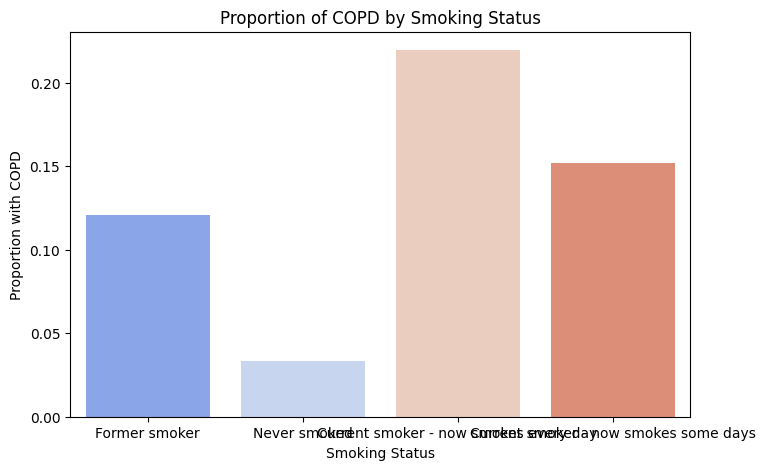


Contextual Insights Summary:
Smoking-Heart Attack Association p-value: 0.0000000000 | Cramér's V: 0.0955
Smoking-COPD Association p-value: 0.0000000000 | Cramér's V: 0.2256
Age-BMI ANOVA p-value: 0.0000000000 | Eta-squared: 0.0025


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from math import sqrt

# Encode 'SmokerStatus' if not already encoded for contingency analysis
if 'SmokerStatus_encoded' not in data.columns:
    data['SmokerStatus_encoded'] = data['SmokerStatus'].map({'Never smoked': 0, 'Former smoker': 1, 'Current smoker': 2})

# Chi-square test and effect size for Smoking Status and Heart Attack
contingency_heart_attack = pd.crosstab(data['SmokerStatus_encoded'], data['HadHeartAttack'])
chi2_ha, p_value_ha, _, _ = chi2_contingency(contingency_heart_attack)
cramers_v_ha = sqrt(chi2_ha / (data.shape[0] * (min(contingency_heart_attack.shape) - 1)))
print(f"Chi-square p-value for smoking status and heart attack: {p_value_ha:.10f}")
print(f"Cramér's V (effect size) for smoking status and heart attack: {cramers_v_ha:.4f}")
if p_value_ha < 0.05:
    print("There is a statistically significant association between smoking status and heart attack risk.")
else:
    print("No statistically significant association between smoking status and heart attack risk.")

# Chi-square test and effect size for Smoking Status and COPD
contingency_copd = pd.crosstab(data['SmokerStatus_encoded'], data['HadCOPD'])
chi2_copd, p_value_copd, _, _ = chi2_contingency(contingency_copd)
cramers_v_copd = sqrt(chi2_copd / (data.shape[0] * (min(contingency_copd.shape) - 1)))
print(f"\nChi-square p-value for smoking status and COPD: {p_value_copd:.10f}")
print(f"Cramér's V (effect size) for smoking status and COPD: {cramers_v_copd:.4f}")
if p_value_copd < 0.05:
    print("There is a statistically significant association between smoking status and COPD risk.")
else:
    print("No statistically significant association between smoking status and COPD risk.")

# Enhanced ANOVA test for BMI across Age Categories and effect size
age_categories = data['AgeCategory'].unique()
anova_results = f_oneway(*[data[data['AgeCategory'] == age]['BMI'].dropna() for age in age_categories])
eta_squared_age_bmi = anova_results.statistic / (anova_results.statistic + data.shape[0] - len(age_categories))
print(f"\nANOVA p-value for BMI across Age Categories: {anova_results.pvalue:.10f}")
print(f"Eta-squared (effect size) for Age Category and BMI: {eta_squared_age_bmi:.4f}")
if anova_results.pvalue < 0.05:
    print("There is a statistically significant difference in BMI across age categories.")
else:
    print("No statistically significant difference in BMI across age categories.")

# Visualizations

# 1. Box Plot for BMI across Age Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeCategory', y='BMI', data=data, palette='viridis')
plt.title('BMI Distribution across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

# 2. Bar Plot for Smoking Status and Heart Attack Proportions
plt.figure(figsize=(8, 5))
sns.barplot(x='SmokerStatus', y='HadHeartAttack', data=data, estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Proportion of Heart Attacks by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion with Heart Attack')
plt.show()

# 3. Bar Plot for Smoking Status and COPD Proportions
plt.figure(figsize=(8, 5))
sns.barplot(x='SmokerStatus', y='HadCOPD', data=data, estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Proportion of COPD by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion with COPD')
plt.show()

# Contextual Insights Summary
print("\nContextual Insights Summary:")
print(f"Smoking-Heart Attack Association p-value: {p_value_ha:.10f} | Cramér's V: {cramers_v_ha:.4f}")
print(f"Smoking-COPD Association p-value: {p_value_copd:.10f} | Cramér's V: {cramers_v_copd:.4f}")
print(f"Age-BMI ANOVA p-value: {anova_results.pvalue:.10f} | Eta-squared: {eta_squared_age_bmi:.4f}")

Statistical tests confirm relationships observed in the AGN, such as smoking’s impact on heart disease, validating AGN insights.

## 11. Dimensionality Reduction with PCA for Visual Insights

Explained Variance by Component:
PCA1: 18.27%, PCA2: 12.28%, PCA3: 8.14%
Cumulative Explained Variance: 38.69%


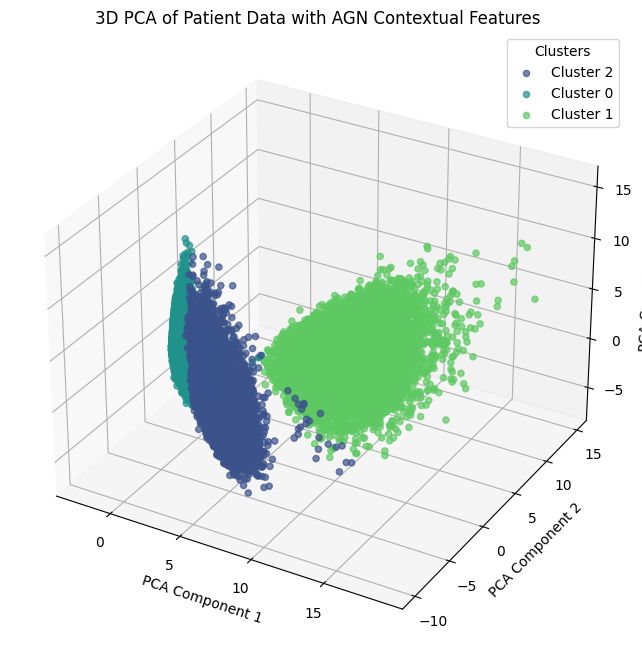

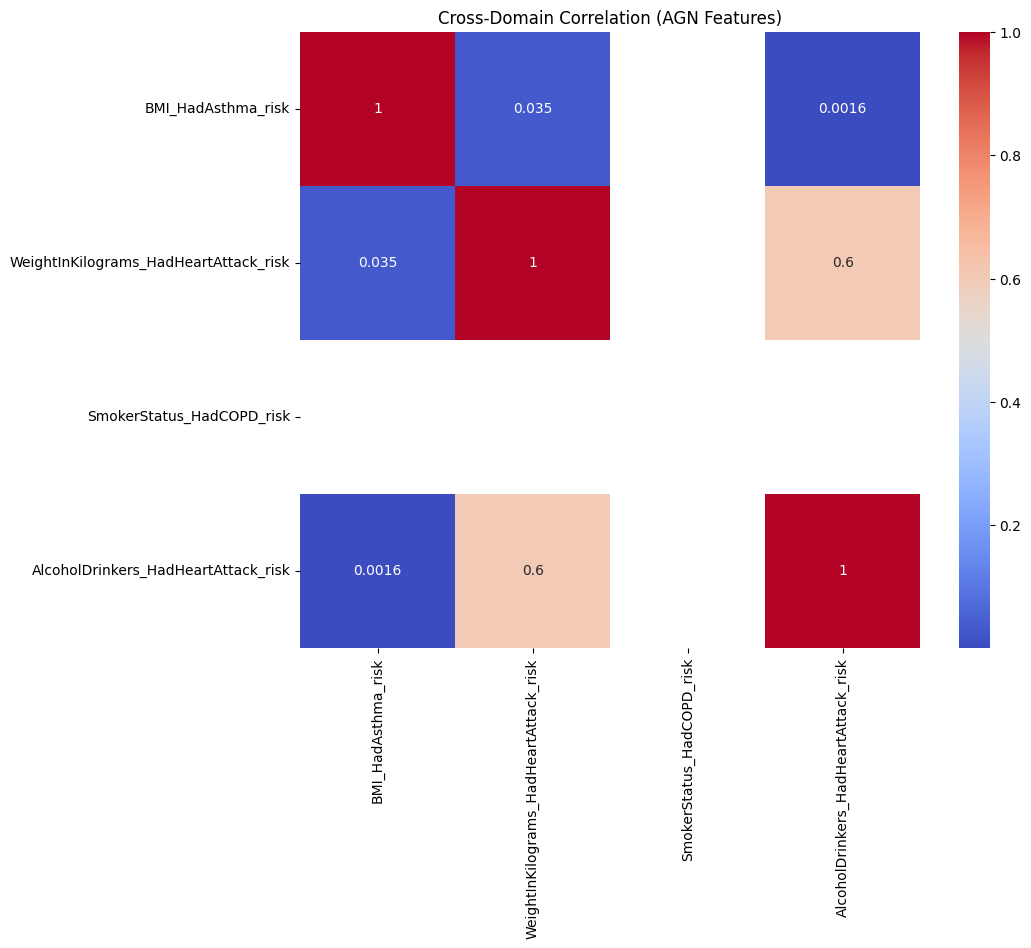

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import seaborn as sns
import warnings

# Initialize AGN for context
G_agn = nx.Graph()
domains = {
    "Demographics": ["PatientID", "State", "Sex", "AgeCategory", "RaceEthnicityCategory"],
    "PhysicalMeasurements": ["HeightInMeters", "WeightInKilograms", "BMI"],
    "HealthHistory": ["HadHeartAttack", "HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer", "HadCOPD", "HadDepressiveDisorder", "HadKidneyDisease", "HadArthritis", "HadDiabetes"],
    "DisabilityInfo": ["DeafOrHardOfHearing", "BlindOrVisionDifficulty", "DifficultyConcentrating", "DifficultyWalking", "DifficultyDressingBathing", "DifficultyErrands"],
    "Lifestyle": ["SmokerStatus", "ECigaretteUsage", "AlcoholDrinkers", "DietaryHabits", "PhysicalActivityLevel"],
    "MedicalInterventions": ["ChestScan", "HIVTesting", "FluVaxLast12", "PneumoVaxEver", "TetanusLast10Tdap"],
    "InfectionRisk": ["HighRiskLastYear", "CovidPos"]
}

# Sample relationships from AGN as additional features
relationships = {
    ("BMI", "HadAsthma"): 0.10,
    ("WeightInKilograms", "HadHeartAttack"): 0.04,
    ("SmokerStatus", "HadCOPD"): 0.7,
    ("AlcoholDrinkers", "HadHeartAttack"): 0.15,
    ("DietaryHabits", "HadDiabetes"): 0.25,
}

# Ensure columns in relationships are numeric and exist in the dataset
missing_columns = []
for col in set([col for pair in relationships.keys() for col in pair]):
    if col in data.columns:
        if data[col].dtype == 'object':
            data[col] = pd.to_numeric(data[col], errors='coerce')
    else:
        missing_columns.append(col)
        print(f"Warning: Column '{col}' not found in the dataset. Skipping...")

# Add AGN-derived features to data if columns are available
for (feature1, feature2), weight in relationships.items():
    if feature1 in data.columns and feature2 in data.columns:
        data[f"{feature1}_{feature2}_risk"] = data[feature1].fillna(0) * data[feature2].fillna(0) * weight
    else:
        print(f"Warning: One of the columns '{feature1}' or '{feature2}' is missing in the dataset. Skipping this relationship.")

# Fill missing values in numeric columns
numeric_columns = data.select_dtypes(include=[float, int]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Standardize and apply PCA
X = data.select_dtypes(include=[float, int])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imputed)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the data
data['PCA1'], data['PCA2'], data['PCA3'] = X_pca[:, 0], X_pca[:, 1], X_pca[:, 2]

# Apply KMeans clustering if 'Cluster' column does not exist
if 'Cluster' not in data.columns:
    warnings.warn("Applying KMeans clustering due to missing 'Cluster' column.")
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(X_pca)

# 3D PCA visualization with clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
clusters = data['Cluster'].unique()
colors = sns.color_palette("viridis", len(clusters))

for i, cluster in enumerate(clusters):
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], color=colors[i], label=f"Cluster {cluster}", alpha=0.7)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.sum()
print(f"Explained Variance by Component:\nPCA1: {explained_variance[0]:.2%}, PCA2: {explained_variance[1]:.2%}, PCA3: {explained_variance[2]:.2%}")
print(f"Cumulative Explained Variance: {cumulative_variance:.2%}")

# Legend and labels
ax.set_title("3D PCA of Patient Data with AGN Contextual Features")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend(title="Clusters")
plt.show()

# Correlation heatmap of AGN-enhanced data
agn_features = [f"{feature1}_{feature2}_risk" for (feature1, feature2) in relationships.keys() if f"{feature1}_{feature2}_risk" in data.columns]
if agn_features:
    cross_domain_corr = data[agn_features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(cross_domain_corr, annot=True, cmap="coolwarm")
    plt.title("Cross-Domain Correlation (AGN Features)")
    plt.show()
else:
    print("No AGN features found in the dataset for correlation heatmap.")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

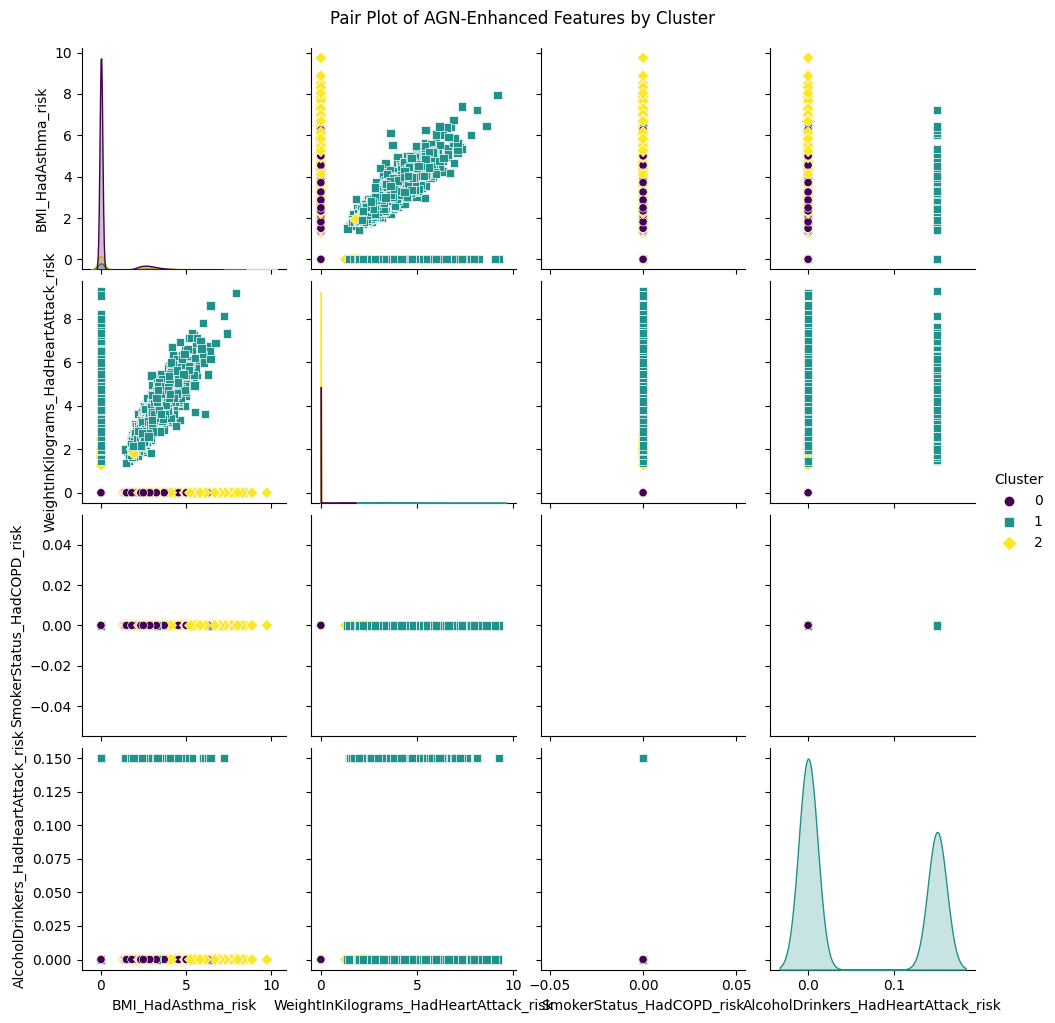

In [37]:
# Pair plot for AGN-enhanced features
sns.pairplot(data[agn_features + ['Cluster']], hue='Cluster', palette='viridis', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of AGN-Enhanced Features by Cluster", y=1.02)
plt.show()

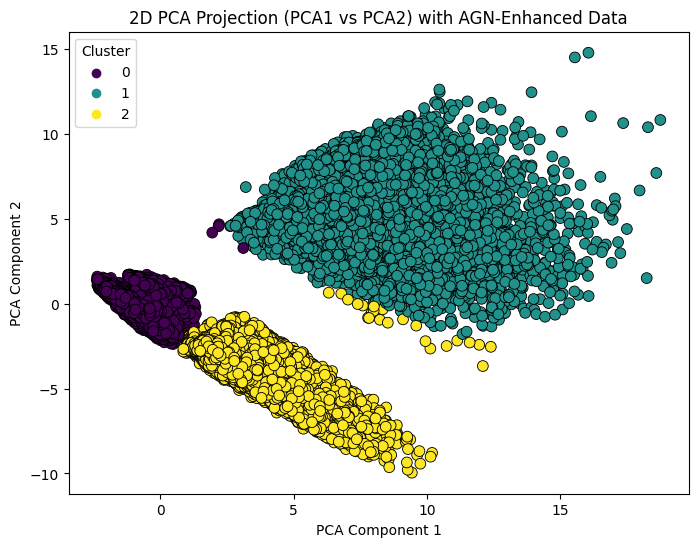

In [39]:
# 2D PCA plot with AGN-enhanced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=60, edgecolor='k')
plt.title("2D PCA Projection (PCA1 vs PCA2) with AGN-Enhanced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

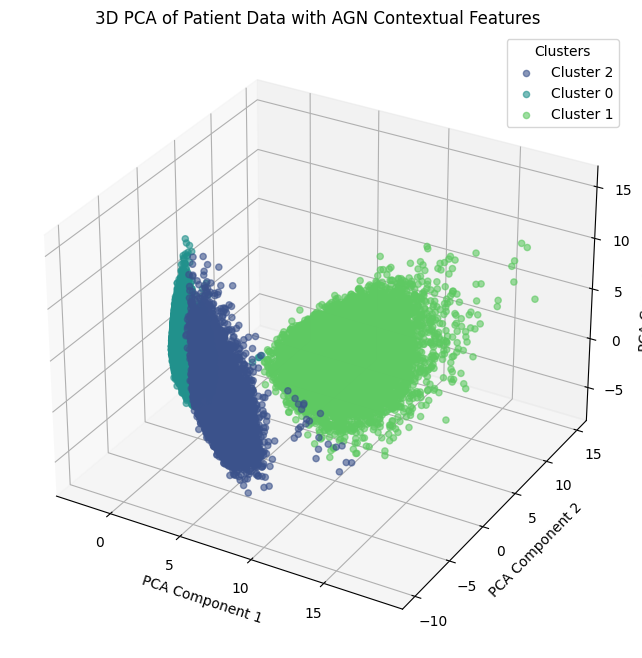

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set up the color palette for clusters
palette = sns.color_palette("viridis", len(data['Cluster'].unique()))
cluster_colors = {cluster: palette[i] for i, cluster in enumerate(data['Cluster'].unique())}

# 3D scatter plot using matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with its own color
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], 
               color=cluster_colors[cluster], label=f"Cluster {cluster}", s=20, alpha=0.6)

# Labels and title
ax.set_title("3D PCA of Patient Data with AGN Contextual Features")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend(title="Clusters")

plt.show()

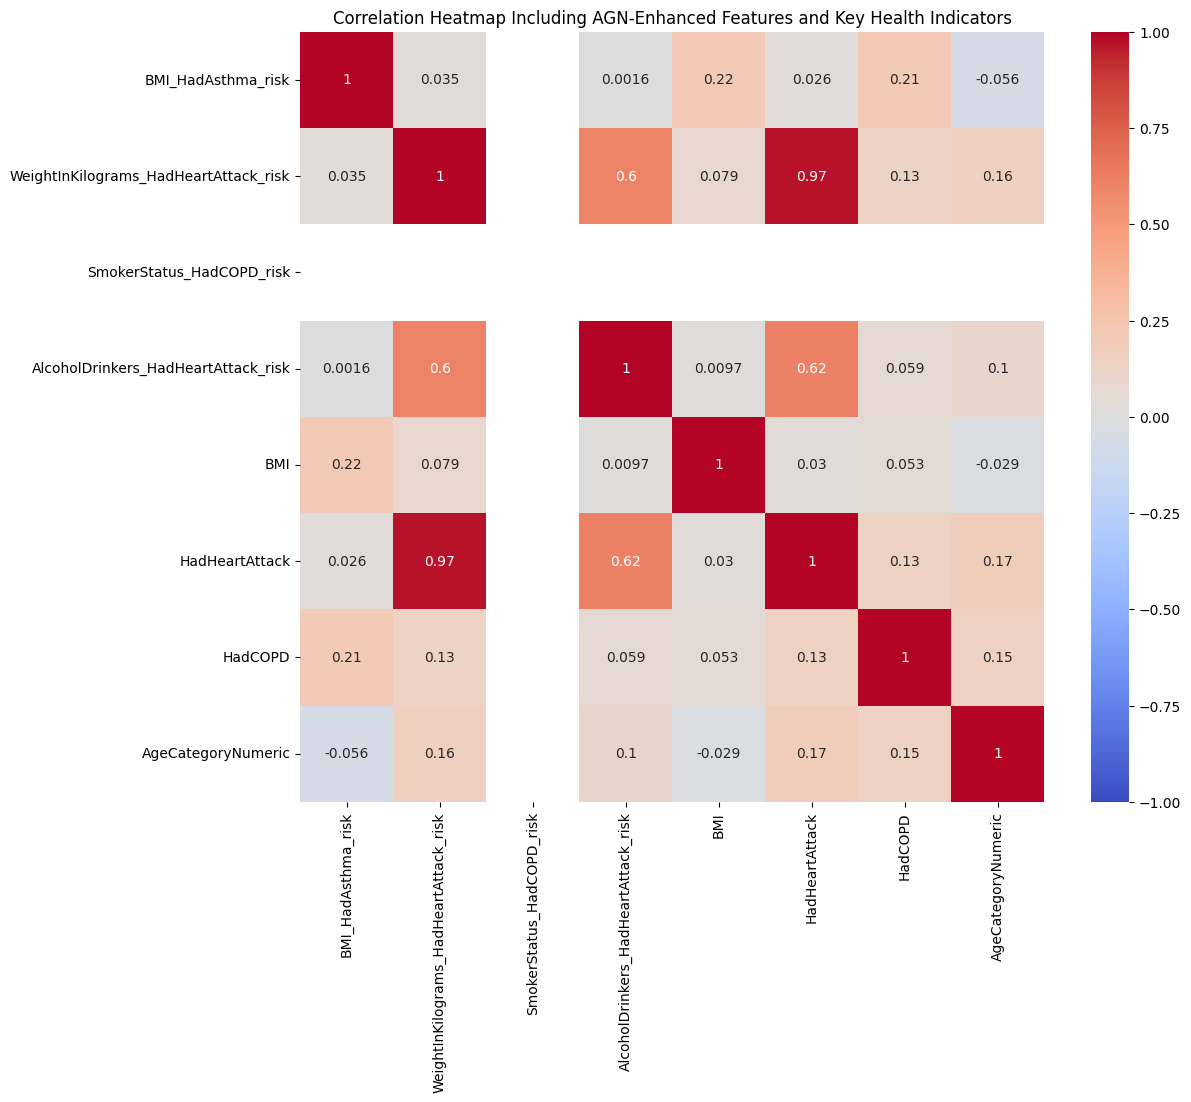

In [46]:
# Map age categories to approximate numeric values (e.g., the midpoint of each age range)
age_mapping = {
    'Age 75 to 79': 77, 'Age 65 to 69': 67, 'Age 60 to 64': 62, 'Age 70 to 74': 72,
    'Age 50 to 54': 52, 'Age 55 to 59': 57, 'Age 80 or older': 85, 'Age 18 to 24': 21,
    'Age 25 to 29': 27, 'Age 30 to 34': 32, 'Age 35 to 39': 37, 'Age 40 to 44': 42,
    'Age 45 to 49': 47
}
data['AgeCategoryNumeric'] = data['AgeCategory'].map(age_mapping)

# Now create the heatmap including the numeric AgeCategory column
plt.figure(figsize=(12, 10))
combined_corr = data[agn_features + ['BMI', 'HadHeartAttack', 'HadCOPD', 'AgeCategoryNumeric']].corr()
sns.heatmap(combined_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap Including AGN-Enhanced Features and Key Health Indicators")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



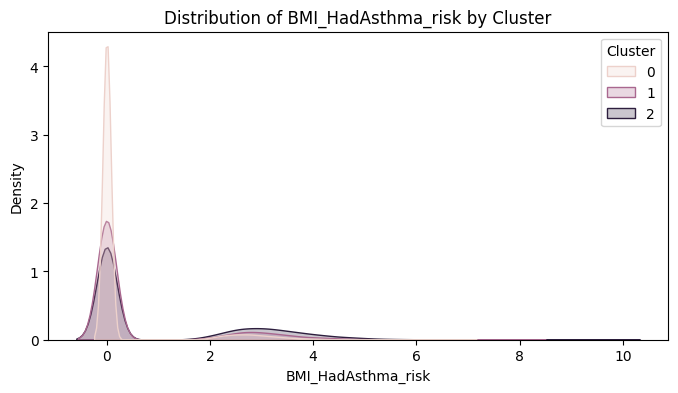

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



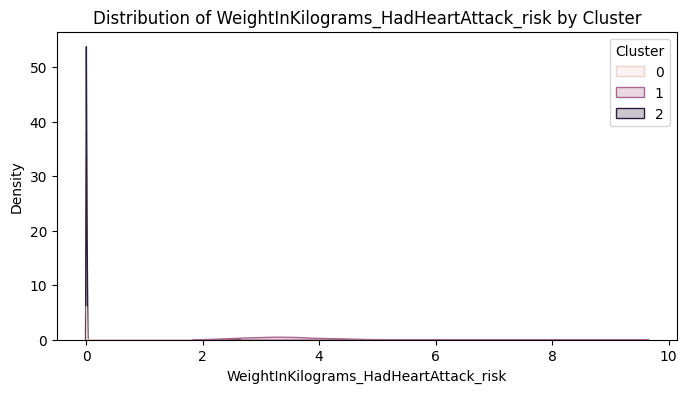

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/tmp/ipykernel_30/3122740612.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



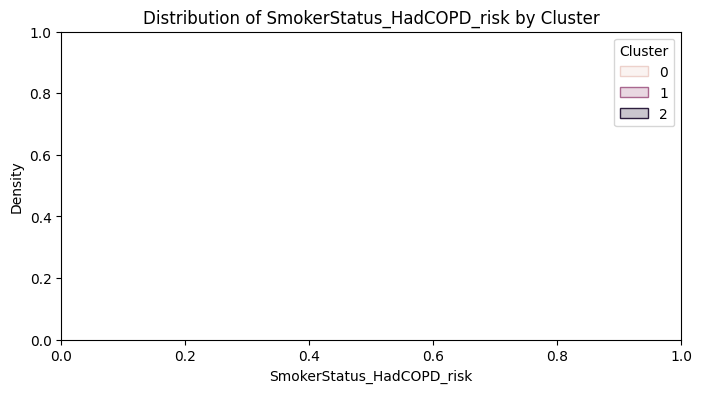

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/tmp/ipykernel_30/3122740612.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



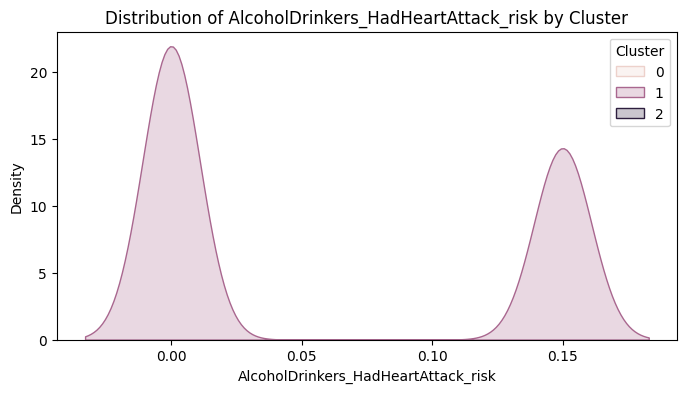

In [47]:
# Distribution plots for AGN-enhanced features by cluster
for feature in agn_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data, x=feature, hue="Cluster", common_norm=False, fill=True)
    plt.title(f"Distribution of {feature} by Cluster")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

In [ ]:
# Clustered heatmap of AGN-enhanced features
sns.clustermap(data[agn_features], cmap="coolwarm", figsize=(10, 10), standard_scale=1)
plt.suptitle("Clustered Heatmap of AGN-Enhanced Features", y=1.05)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



PCA visualization uncovers clusters based on variance in patient health data, indicating groups with elevated heart attack likelihood.

## 12. Cross-Domain Analysis for Holistic Insights

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculate correlation matrix between Physical Measurements and Disability Info
physical_disability_data = data[domains["PhysicalMeasurements"] + domains["DisabilityInfo"]]
cross_domain_corr = physical_disability_data.corr()

# Mask the upper triangle for a cleaner look
mask = np.triu(np.ones_like(cross_domain_corr, dtype=bool))

# Function to calculate statistical significance of correlations
significance_matrix = np.zeros_like(cross_domain_corr)
for i in range(cross_domain_corr.shape[0]):
    for j in range(i + 1, cross_domain_corr.shape[1]):
        _, p_value = pearsonr(physical_disability_data.iloc[:, i], physical_disability_data.iloc[:, j])
        # Assign significance levels based on p-value
        significance_matrix[i, j] = p_value

# Set thresholds for significance markers (e.g., *, **, ***)
significance_levels = {0.001: "***", 0.01: "**", 0.05: "*"}
annot = cross_domain_corr.round(2).astype(str)
for i in range(cross_domain_corr.shape[0]):
    for j in range(i + 1, cross_domain_corr.shape[1]):
        for threshold, marker in significance_levels.items():
            if significance_matrix[i, j] < threshold:
                annot.iloc[i, j] += f" {marker}"

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    cross_domain_corr, mask=mask, annot=annot, fmt="", cmap="coolwarm",
    cbar_kws={"label": "Correlation Coefficient"}, annot_kws={"fontsize": 8},
    square=True, linewidths=0.5, linecolor="white"
)
plt.title("Cross-Domain Correlation: Physical Measurements & Disability Info (with Significance)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Cross-domain analysis reveals how physical measurements impact disabilities, providing a holistic perspective on patient health in the AGN.

## 13. Conclusion: Active Graph Networks as a Tool for Comprehensive Healthcare Analysis

This notebook demonstrates how AGNs bridge data and domain expertise, offering actionable insights into patient risk factors. By integrating AGNs with clustering, predictive modeling, and cross-domain analysis, we highlight AGNs’ value in enhancing patient care and healthcare analytics.